# Projeto final do curso de Machine Learning II da ADA

## Premissa


Como forma de avaliação e validação dos conhecimento adquiridos durante o módulo "*Machine Lerning I*" no curso de *Data Science* ministrado pelo professor [Professor](), na instituição [**Ada Tech**](https://ada.tech/), foi proposto um trabalho final que utilize os conhecimentos demonstrados e adquiridos durante a execução do curso.

O trabalho consiste em escolher um dataset de domínio publico e aplicar as ferramentas aprendidas em aula, de forma a obter, um modelo de aprendizado de máquina, capaz de categorizar e generalizar respostas em consistencia com o banco de dados no qual foi utilizado para o seu treinamento.

## Alunos/Autores

Os alunos que desenvolveram o trabalho foram:
- [Carolina Rutili de Lima](https://www.linkedin.com/in/carolinarutili/)
- [Hugo Cezar Sales de Souza](https://www.linkedin.com/in/hugo-cs-souza/)


## Escolha do Dataset

O [dataset escolhido](https://www.kaggle.com/datasets/princeiornongu/merged-cc), visando aplicar os conhecimento aprendidos em aula em conceitos práticos, nos reune conhecimentos sobre a variação da temperatura de regiões do planeta ao longo do século passado até os dias atuais (mais precisamente, do ano de 1961 e 2022). 

O dataset corresponde em apenas uma tabela que contém o País, sua respectiva sigla em ISO3, o indicador, as temperaturas médias coletadas por ano, a região do globo no qual esta região se encontra, a unidade de temperatura e a fonte.

No documento explicativo do kaggle, é informado que o dataset é bastante utilizado para ferramentas de machine learning como regressão, classificação, clusterização, série temporais etc. O que torna o dataset uma boa escolha para demonstrativo de conhecimentos sobre a disciplina.



## Objetivo

O objetivo deste trabalho é utilizar o dataset sobre movimento das temperaturas médias, conseguir descobrir de que região do globo estamos falando.

## Desenvolvimento


### Ferramentas utilizadas

As ferramentas/conhecimentos utilizados no desenvolvimento deste trabalho serão:
- Python e Jupyter Notebook
- Pandas, Numpy e Seaborn
- SVM (*Support Vector Machines*)
- Métricas de Avaliação de Modelos de Classificação
- Otimização de hiperparâmetros

### Execução do código

#### Inicialização e verificação das variáveis essenciais para o modelo

##### Importação das bibliotecas

In [61]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
import sklearn.datasets as skdata
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.impute import  SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from xgboost import XGBClassifier, plot_importance

##### Importação do dataset e análise inicial sobre as variáveis disponíveis

In [3]:
df = pd.read_csv('../dataset/CC.csv')
print(df.head())

               Country ISO3  \
0              Albania  ALB   
1              Algeria  DZA   
2       American Samoa  ASM   
3               Angola  AGO   
4  Antigua and Barbuda  ATG   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source   1961   1962   1963  \
0  Food and Agriculture Organization of the Unite...  0.627  0.326  0.075   
1  Food and Agriculture Organization of the Unite...  0.164  0.114  0.077   
2  Food and Agriculture Organization of the Unite...  0.079 -0.042  0.169   
3  Food and Agriculture Organization of the Unite...  0.041 -0.152 -0.19

In [4]:
df.shape

(141, 71)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        141 non-null    object 
 1   ISO3           141 non-null    object 
 2   Indicator      141 non-null    object 
 3   Unit           141 non-null    object 
 4   Source         141 non-null    object 
 5   1961           141 non-null    float64
 6   1962           141 non-null    float64
 7   1963           141 non-null    float64
 8   1964           141 non-null    float64
 9   1965           141 non-null    float64
 10  1966           141 non-null    float64
 11  1967           141 non-null    float64
 12  1968           141 non-null    float64
 13  1969           141 non-null    float64
 14  1970           141 non-null    float64
 15  1971           141 non-null    float64
 16  1972           141 non-null    float64
 17  1973           141 non-null    float64
 18  1974      

In [6]:
# Verificando se há mais de um registro igual
df.value_counts()

Country           ISO3  Indicator                                                                                         Unit            Source                                                                                                                                                                                                                                               1961    1962    1963    1964    1965    1966    1967    1968    1969    1970    1971    1972    1973    1974    1975    1976    1977    1978    1979    1980    1981    1982    1983    1984    1985    1986    1987    1988   1989    1990   1991    1992    1993    1994    1995    1996    1997    1998   1999   2000    2001   2002   2003   2004    2005   2006    2007   2008   2009    2010   2011   2012   2013   2014   2015   2016   2017   2018   2019   2020   2021    2022    Sub-Region                  Income Group         Area (KM²)  Density (KM²)
Albania           ALB   Temperature change with respect to a baseli

In [7]:
#Verificando se todas as variações estão na mesma escala
df['Unit'].value_counts()

Unit
Degree Celsius    141
Name: count, dtype: int64

In [8]:
#Verificando se a coluna indicador modifica e tem alguma relação com os dados que possa ser mensurada e transformada em dados
df['Indicator'].value_counts()

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    141
Name: count, dtype: int64

In [9]:
#Verificando se a coluna fonte modifica e tem alguma relação com os dados que possa ser mensurada e transformada em dados
df['Source'].value_counts()

Source
Food and Agriculture Organization of the United Nations (FAO). 2022. FAOSTAT Climate Change, Climate Indicators, Temperature change. License: CC BY-NC-SA 3.0 IGO. Extracted from: https://www.fao.org/faostat/en/#data/ET. Accessed on 2023-03-28.    141
Name: count, dtype: int64

###### Modificação para melhoramento do dataset

In [10]:
# Vão ser retiradas as colunas "source", "indicator" e "unit" pois não é possivel extrair boas métricas deles.
df.drop(columns=['Source','Indicator','Unit' ], inplace=True)

In [11]:
# Salvar o novo dataset
df.to_csv('../dataset/new_data.csv', index=False)

#### SVM

In [12]:
# Carregar data set
df = pd.read_csv('../dataset/new_data.csv')

# verificar valores
print(df.head())

               Country ISO3   1961   1962   1963   1964   1965   1966   1967  \
0              Albania  ALB  0.627  0.326  0.075 -0.166 -0.388  0.559 -0.074   
1              Algeria  DZA  0.164  0.114  0.077  0.250 -0.100  0.433 -0.026   
2       American Samoa  ASM  0.079 -0.042  0.169 -0.140 -0.562  0.181 -0.368   
3               Angola  AGO  0.041 -0.152 -0.190 -0.229 -0.196  0.175 -0.081   
4  Antigua and Barbuda  ATG  0.090  0.031  0.288  0.214 -0.385  0.097 -0.192   

    1968  ...   2017   2018   2019   2020   2021   2022  \
0  0.081  ...  1.121  2.028  1.675  1.498  1.536  1.518   
1 -0.067  ...  1.512  1.210  1.115  1.926  2.330  1.688   
2 -0.187  ...  1.435  1.189  1.539  1.430  1.268  1.256   
3 -0.193  ...  0.870  1.395  1.752  1.162  1.553  1.212   
4 -0.225  ...  0.958  0.627  0.797  1.131  0.862  0.770   

                   Sub-Region         Income Group  Area (KM²)  Density (KM²)  
0       Europe & Central Asia  Upper middle income     28748.0            103  
1  M

In [13]:
# Verificar distribuição de paises por região
df["Sub-Region"].value_counts(normalize = True)

Sub-Region
Europe & Central Asia         0.248227
Latin America & Caribbean     0.219858
Sub-Saharan Africa            0.212766
East Asia & Pacific           0.148936
Middle East & North Africa    0.106383
South Asia                    0.049645
North America                 0.014184
Name: proportion, dtype: float64

In [14]:
#Verificar a distribuição da condição econômica dos países 
df["Income Group"].value_counts(normalize = True)

Income Group
High income            0.397163
Lower middle income    0.255319
Upper middle income    0.248227
Low income             0.099291
Name: proportion, dtype: float64

In [15]:
#Selecionando apenas colunas numéricas
df_num = df.select_dtypes(include= np.number)
df_num.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,2020,2021,2022,Area (KM²),Density (KM²)
0,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,28748.0,103
1,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,2381741.0,19
2,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256,199.0,220
3,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,0.248,...,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,1246700.0,29
4,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,0.271,0.109,...,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770,442.0,214


In [16]:
# Utilizar os dados para conseguir classificar através da variação da temperatura e da área e densidade
X = df_num
y = df["Sub-Region"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [17]:
#Verificar se a estratificação para manter a proporção dos dados de teste e treinamento parecidas
y_train.value_counts(dropna = False, normalize=  True)

Sub-Region
Europe & Central Asia         0.244898
Latin America & Caribbean     0.224490
Sub-Saharan Africa            0.214286
East Asia & Pacific           0.153061
Middle East & North Africa    0.102041
South Asia                    0.051020
North America                 0.010204
Name: proportion, dtype: float64

In [18]:
y_test.value_counts(dropna = False, normalize=  True)

Sub-Region
Europe & Central Asia         0.255814
Latin America & Caribbean     0.209302
Sub-Saharan Africa            0.209302
East Asia & Pacific           0.139535
Middle East & North Africa    0.116279
South Asia                    0.046512
North America                 0.023256
Name: proportion, dtype: float64

In [19]:
svc = SVC(random_state = 0, C = 10**6)
svc.fit(X_train, y_train)

SVC(C=1000000, random_state=0)

------------------------------ Resultado Treino ------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       0.47      0.47      0.47        15
     Europe & Central Asia       0.38      0.54      0.45        24
 Latin America & Caribbean       0.40      0.55      0.46        22
Middle East & North Africa       0.75      0.30      0.43        10
             North America       1.00      1.00      1.00         1
                South Asia       1.00      0.40      0.57         5
        Sub-Saharan Africa       0.67      0.38      0.48        21

                  accuracy                           0.47        98
                 macro avg       0.67      0.52      0.55        98
              weighted avg       0.54      0.47      0.47        98

------------------------------ Matriz de confusão ------------------------------


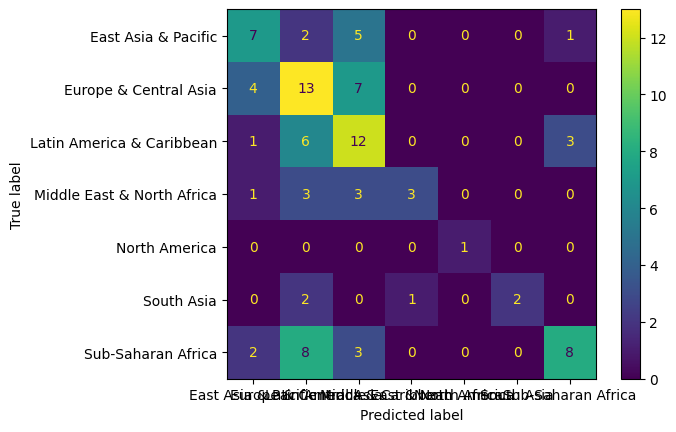

In [20]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print('--'*15,'Resultado Treino','--'*15)
print(classification_report(y_train , y_pred_train))
print('--'*15,'Matriz de confusão','--'*15)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

------------------------------ Resultado Teste ------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00         6
     Europe & Central Asia       0.25      0.36      0.30        11
 Latin America & Caribbean       0.20      0.22      0.21         9
Middle East & North Africa       0.00      0.00      0.00         5
             North America       1.00      1.00      1.00         1
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.57      0.44      0.50         9

                  accuracy                           0.26        43
                 macro avg       0.29      0.29      0.29        43
              weighted avg       0.25      0.26      0.25        43

------------------------------ Matriz de confusão ------------------------------


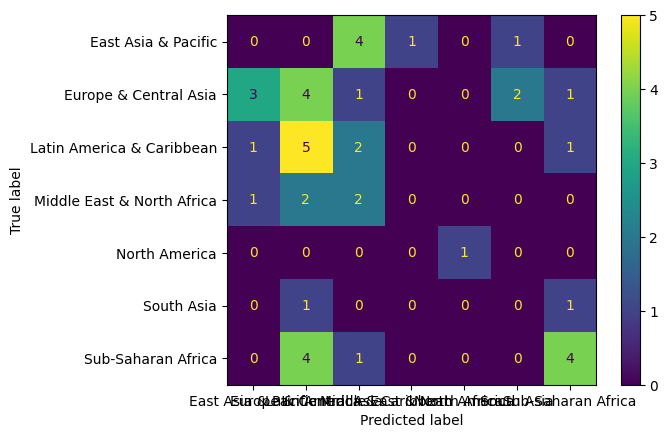

In [21]:
print('--'*15,'Resultado Teste','--'*15)
print(classification_report(y_test , y_pred_test))
print('--'*15,'Matriz de confusão','--'*15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

###### Função para pré-processamento das variáveis

In [22]:
def pipe_pre_process(df):
    X = df.select_dtypes(include= np.number)
    y = df["Sub-Region"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0, stratify = y)

    # tratamento dos dados numericos substituindo valores numeros pela média 
    pipe_features_num = Pipeline([
        ("input_num", SimpleImputer(strategy = "mean")),
        ("scaler", StandardScaler())    
    ])

    # pegando o nome das variáveis numéricas
    features_num = X_train.select_dtypes(include = np.number).columns.tolist()

    # tratamento dos dados categoricos
    pipe_features_cat = Pipeline([
        ("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")),
        ("one_hot", OneHotEncoder())
    ])

    # pegando o nome das variáveis categoricas
    features_cat = X_train.select_dtypes(exclude = np.number).columns.tolist()

    pre_processador = ColumnTransformer([
        ("transf_num", pipe_features_num, features_num),
        ("transf_cat", pipe_features_cat, features_cat)
    ])
    
    return X_train, X_test, y_train, y_test, pre_processador

###### Função para melhorar os estimadores

In [23]:
def metricas_classificacao(estimator):
    #=================
    print("\n",'--'*20,"Métricas da avaliação de treino:","--"*20)
    
    y_pred_train = estimator.predict(X_train) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_train, y_pred_train)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    
    print(classification_report(y_train, y_pred_train))
    
    #=================
    print("\n",'--'*20,"Métricas da avaliação de teste:","--"*20)
    
    y_pred_test = estimator.predict(X_test) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_test, y_pred_test)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    
    print(classification_report(y_test, y_pred_test))

###### Modelo

In [24]:
# Primeiro, vamos usar nossa função de pré-processamento dos dados
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process(df)

# Preparando os dados e instanciando o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=0))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'

In [25]:
metricas_classificacao(pipe_svc)


 ---------------------------------------- Métricas da avaliação de treino: ----------------------------------------


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

###### Grid Search

In [ ]:
# Escolhendo os parâmetros para o gridsearch
param_grid_svc = {"svc__kernel": ["linear", "rbf", "poly"],
                 "svc__C": np.logspace(-2,2,5),
                 "svc__gamma": np.logspace(-2,2,5)}

splitter = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

grid_svc = GridSearchCV(estimator= pipe_svc,
                       param_grid= param_grid_svc,
                       cv=splitter,
                       verbose= 10,
                       n_jobs= -1)
grid_svc.fit(X_train, y_train)

grid_svc.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits


c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [ ]:
metricas_classificacao(grid_svc)

#### Regressão Logística - Boosting : AdaBoost

In [26]:
X = df_num
y = df["Sub-Region"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [31]:
# modelo de voting 

## instanciar nossos modelos de classificação
lr = LogisticRegression(random_state = 2, solver = "lbfgs")
svc = SVC(random_state = 2, max_iter = 10000, kernel = "poly", degree = 5, C = 10000)

modelo = VotingClassifier(
    [
        ("lr", lr), 
        ("svc", svc)
    ]
)

modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


---------------------------------------- TREINO ----------------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00        17
     Europe & Central Asia       0.31      1.00      0.47        28
 Latin America & Caribbean       0.27      0.24      0.26        25
Middle East & North Africa       0.00      0.00      0.00        12
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         5
        Sub-Saharan Africa       0.00      0.00      0.00        24

                  accuracy                           0.30       112
                 macro avg       0.08      0.18      0.10       112
              weighted avg       0.14      0.30      0.18       112



c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

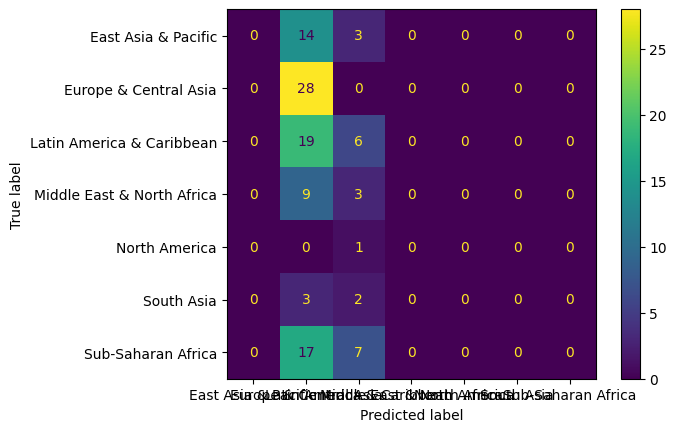



---------------------------------------- TESTE ----------------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00         4
     Europe & Central Asia       0.26      0.86      0.40         7
 Latin America & Caribbean       0.17      0.17      0.17         6
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.00      0.00      0.00         6

                  accuracy                           0.24        29
                 macro avg       0.06      0.15      0.08        29
              weighted avg       0.10      0.24      0.13        29



c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

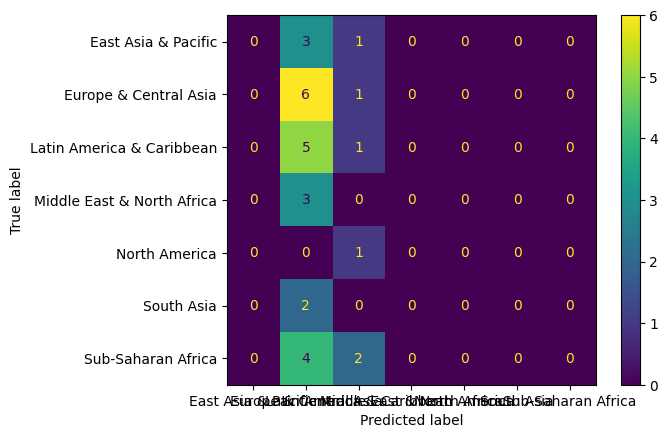

In [32]:
print("--"*20,"TREINO","--"*20)
print(classification_report(y_train, y_pred_train))
print(ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train))
plt.show()

print("\n")
print("--"*20,"TESTE","--"*20)
print(classification_report(y_test, y_pred_test))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test))

#### Gradient boosting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, 
    n_estimators = 100,
    max_depth = 3
)
gbc.fit(X_train, y_train)
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

---------------------------------------- TREINO ----------------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       1.00      1.00      1.00        17
     Europe & Central Asia       1.00      1.00      1.00        28
 Latin America & Caribbean       1.00      1.00      1.00        25
Middle East & North Africa       1.00      1.00      1.00        12
             North America       1.00      1.00      1.00         1
                South Asia       1.00      1.00      1.00         5
        Sub-Saharan Africa       1.00      1.00      1.00        24

                  accuracy                           1.00       112
                 macro avg       1.00      1.00      1.00       112
              weighted avg       1.00      1.00      1.00       112



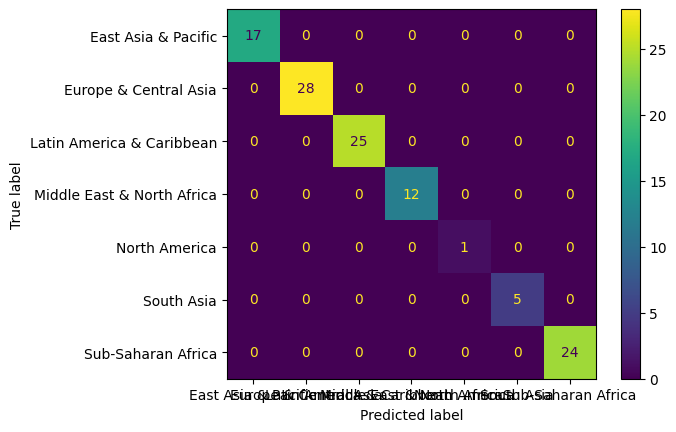

---------------------------------------- TESTE ----------------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       1.00      0.50      0.67         4
     Europe & Central Asia       1.00      0.86      0.92         7
 Latin America & Caribbean       0.86      1.00      0.92         6
Middle East & North Africa       1.00      0.33      0.50         3
             North America       1.00      1.00      1.00         1
                South Asia       1.00      0.50      0.67         2
        Sub-Saharan Africa       0.55      1.00      0.71         6

                  accuracy                           0.79        29
                 macro avg       0.91      0.74      0.77        29
              weighted avg       0.88      0.79      0.78        29



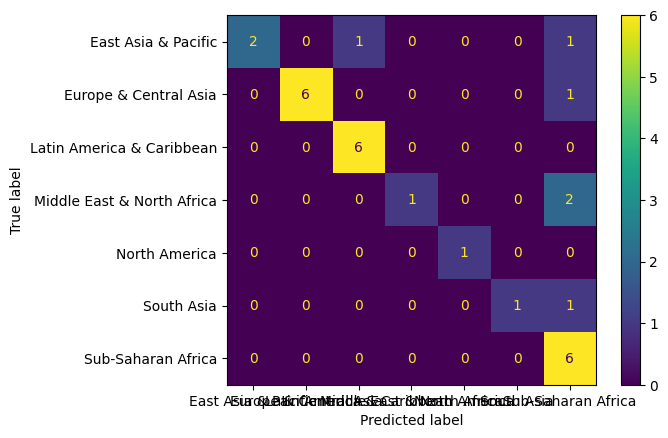

In [36]:
print("--"*20,"TREINO","--"*20)
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("--"*20,"TESTE","--"*20)
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

#### XGBoost

In [40]:
enconder = LabelEncoder()
y_target = enconder.fit_transform(df["Sub-Region"])
y_target
X = df_num
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size = 0.2, stratify = y, random_state = 2)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

---------------------------------------- TREINO ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        24

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



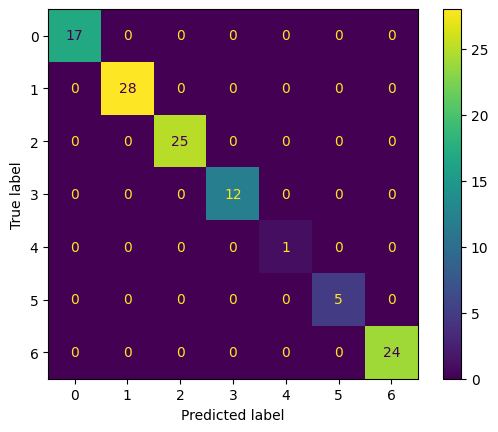

---------------------------------------- TESTE ----------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.83      0.71      0.77         7
           2       0.56      0.83      0.67         6
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      0.83      0.91         6

    accuracy                           0.69        29
   macro avg       0.63      0.58      0.58        29
weighted avg       0.71      0.69      0.69        29



c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

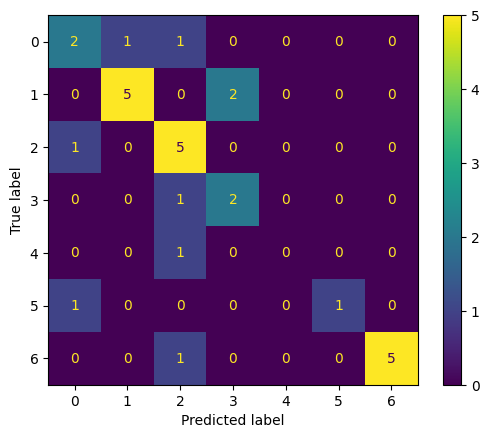

In [41]:
print("--"*20,"TREINO","--"*20)
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("--"*20,"TESTE","--"*20)
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

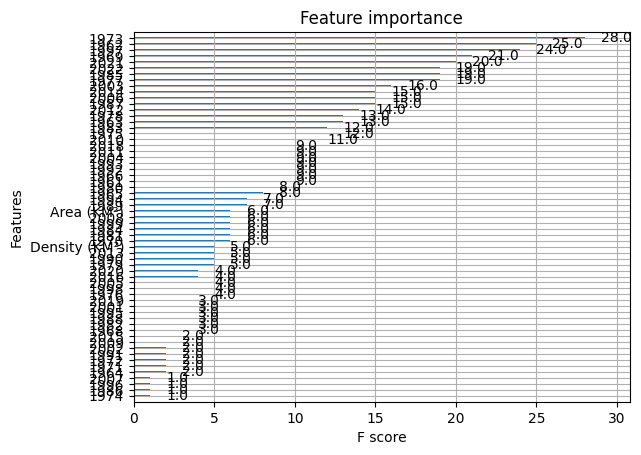

In [43]:
plot_importance(xgb)

#### LGBM

In [46]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_train = lgbm.predict(X_train)
y_pred_test = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 64
[LightGBM] [Info] Start training from score -1.885286
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.499623
[LightGBM] [Info] Start training from score -2.233592
[LightGBM] [Info] Start training from score -4.718499
[LightGBM] [Info] Start training from score -3.109061
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

---------------------------------------- TREINO ----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        24

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



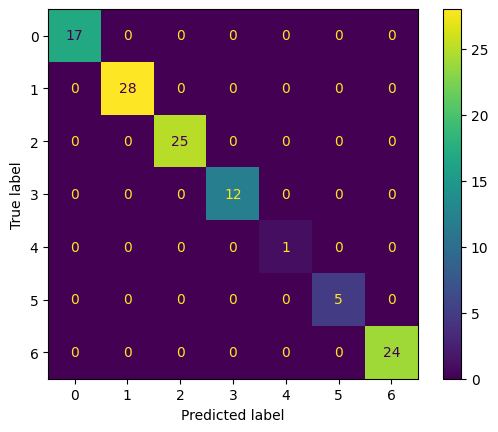

---------------------------------------- TESTE ----------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.83      0.71      0.77         7
           2       0.62      0.83      0.71         6
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.86      1.00      0.92         6

    accuracy                           0.69        29
   macro avg       0.47      0.53      0.50        29
weighted avg       0.63      0.69      0.65        29



c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

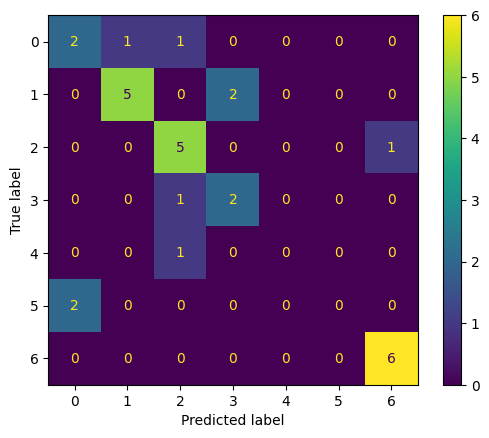

In [47]:
print("--"*20,"TREINO","--"*20)
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("--"*20,"TESTE","--"*20)
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

#### K-Means

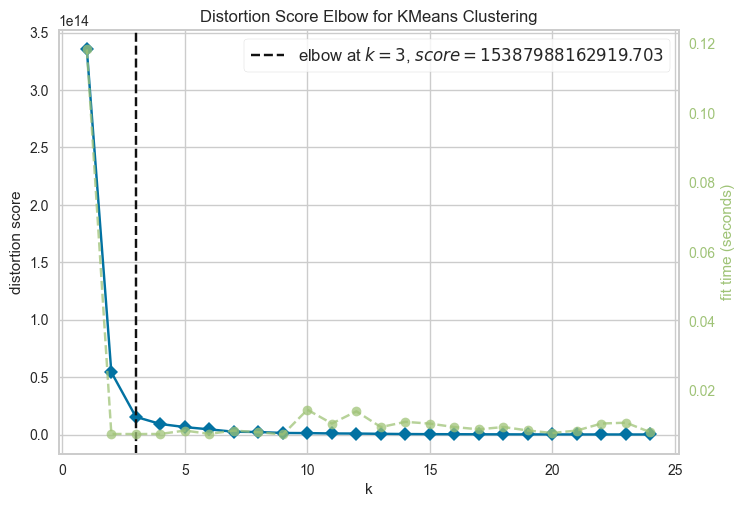

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# Instancia o modelo
model = KMeans()
 
# Instancia o visualizador
visualizer = KElbowVisualizer(model,       # o modelo K-means a ser utilizado
                              k = (1, 25)) # Faixa de valores para o K
 
# Fit do Visualizador
visualizer.fit(df_num)
 
# Mostra o gráfico
visualizer.show()

In [53]:
# O melhor valor de K ficou igual a 3
# Instancia o modelo
model = KMeans(n_clusters = 3,    # Define o número de clusters a ser utilizados
               random_state = 42) # Define a Semente Aleatória
 
# Treinamento do K-Means
model.fit(df_num)
 
# Definindo os clusters
clusters = model.predict(df_num)
clusters

array([0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

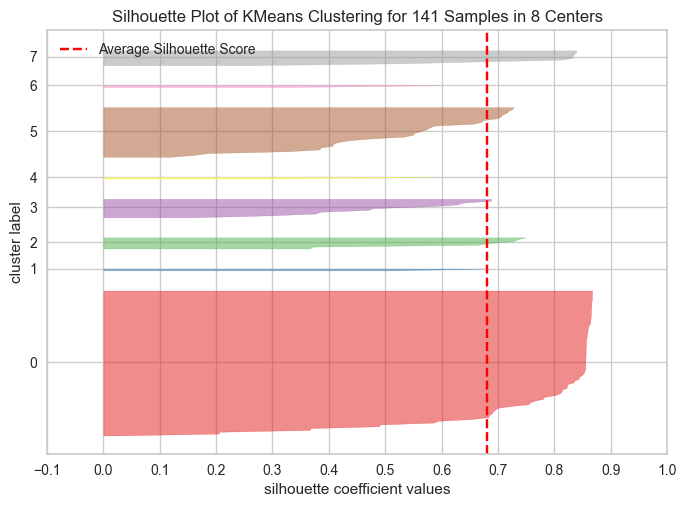

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 141 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
# Instancia o modelo
model = KMeans()
 
# Instancia o visualizador
visualizer = silhouette_visualizer(model,       # o modelo K-means a ser utilizado
                                   df_num)           # o conjunto de dados
 
# Mostra o gráfico
visualizer.show()

#### Método da Silhueta 

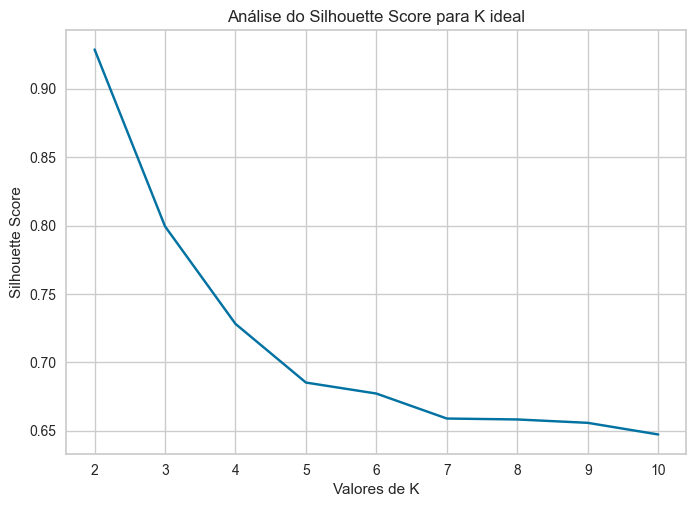

In [59]:
# Cria uma lista vazia para salvar os valores de score
scores = []
 
# Determina o tamanho da faixa de testes
range_clusters = range(2, 11)
 
# Processo iterativo para determinar os scores
for n in range_clusters:
    
    # Instancia o modelo
    kmeans = KMeans(n_clusters = n, random_state = 42)
    
    # Fit do modelo
    kmeans.fit(df_num)
    
    # Determina as labels dos clusters
    clusters = kmeans.labels_
    
    # Calcula o score e anexa na lista
    scores.append(silhouette_score(df_num, clusters))
 
# Cria o gráfico dos scores pelos valores de K    
plt.plot(range_clusters, scores, 'bx-')
 
# Atribui um nome ao eixo X
plt.xlabel('Valores de K') 
 
# Atribui o nome ao eixo Y
plt.ylabel('Silhouette Score') 
 
# Adiciona um título
plt.title('Análise do Silhouette Score para K ideal')
 
# Mostra o gráfico
plt.show()

#### DBSCAN

InvalidIndexError: (slice(None, None, None), 0)

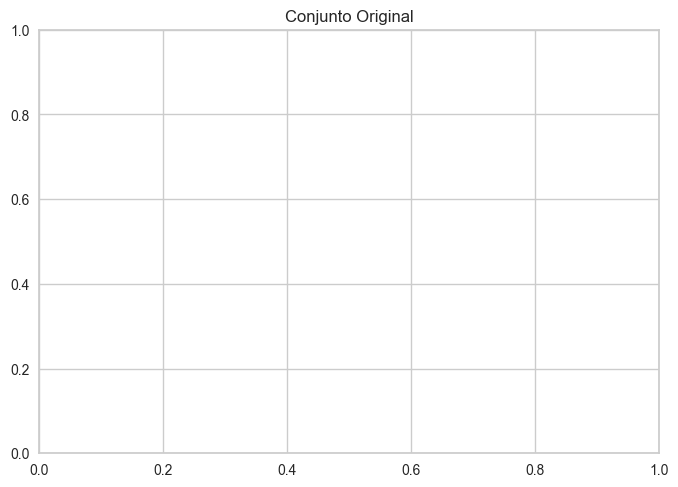

In [62]:
# Criando um conjunto de dados em forma de lua (usando o make_moons)
# número de observações
n_samples =1000
 
# gera os dados
data = skdata.make_moons(n_samples=n_samples, noise=0.10)
 
# Definindo o conjunto de dados original
enconder = LabelEncoder()
labels = enconder.fit_transform(df["Sub-Region"])
X = df_num


 
# Gráfico com os dados originais
plt.title("Conjunto Original")
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()
 
 
# Definindo o MinPts e epsilon
# MinPts igual ao dobro de atributos, neste caso igual a 4
MinPts = 4
 
# Instancia o modelo com o número de vizinhos igual ao MinPts
neighbors = NearestNeighbors(n_neighbors = MinPts)
 
# Treina o modelo
neighbors_fit = neighbors.fit(X)
 
# Devolve os valores de distância e índices
distances, indices = neighbors_fit.kneighbors(X)
 
# Ordena as distâncias
distances = np.sort(distances, axis = 0)
 
# Cria o gráfico
plt.plot(distances[:, 1])
 
# Cria o nome do eixo X
plt.xlabel("Valor da Distância K")
 
# Cria o nome do eixo X
plt.ylabel("Valor epsilon")
 
# Mostra o gráfico
plt.show()
 
# o valor de epsilon a ser utilizado seria algo em torno do 0,1 de acordo com o gráfico
epsilon = 0.1
 
# Criando o gráfico para o DBSCAN e comparando com o K-Means
# Definindo o tamanho da janela de gráficos
plt.figure(figsize = (15, 5))
 
# Criando o K-Means 
# número de clusters
k = 2 
 
# Instancia o modelo Kmeans
kmeans = KMeans(n_clusters = k)
 
# Treina o modelo
kmeans.fit(X)
 
# Define os clusters para o KMeans
labels_kmeans = kmeans.fit_predict(X)
 
# Define os centroides
centers = kmeans.cluster_centers_
 
# Mostra o primeiro gráfico
plt.subplot(1, 2, 1)
 
# Cria o gráfico para os pontos do KMeans
plt.scatter(X[:, 0], X[:, 1], c = labels_kmeans, cmap = 'viridis')
 
# Cria os centroides no gráfico
plt.scatter(centers[:, 0], centers[:, 1], c = 'red')
 
# Título do Gráfico
plt.title('K-Means')
 
# Criando agora para o DBSCAN
# Instancia o modelo com o valor de epsilon e MinPts
model = DBSCAN(eps = epsilon, min_samples = MinPts).fit(X)
 
# Define os clusters
clusters = model.labels_
 
 
# Mostra o segundo gráfico
plt.subplot(1, 2, 2)
 
# Cria o gráfico do DBSCAN
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap='viridis')
 
# cria um título
plt.title('DBSCAN')
 
# Mostra os gráficos
plt.show()

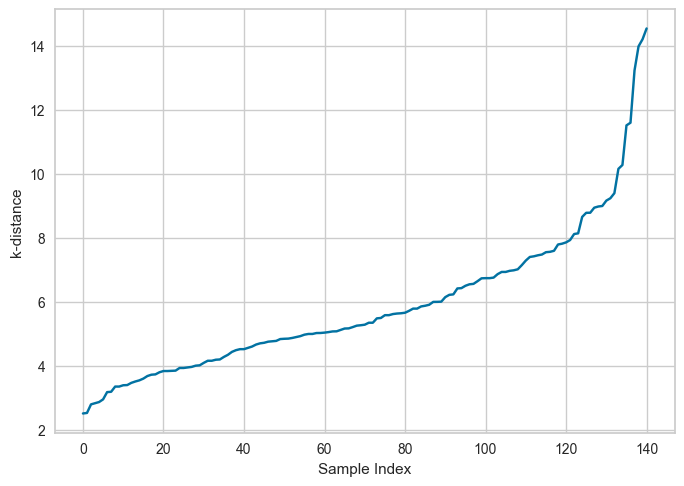

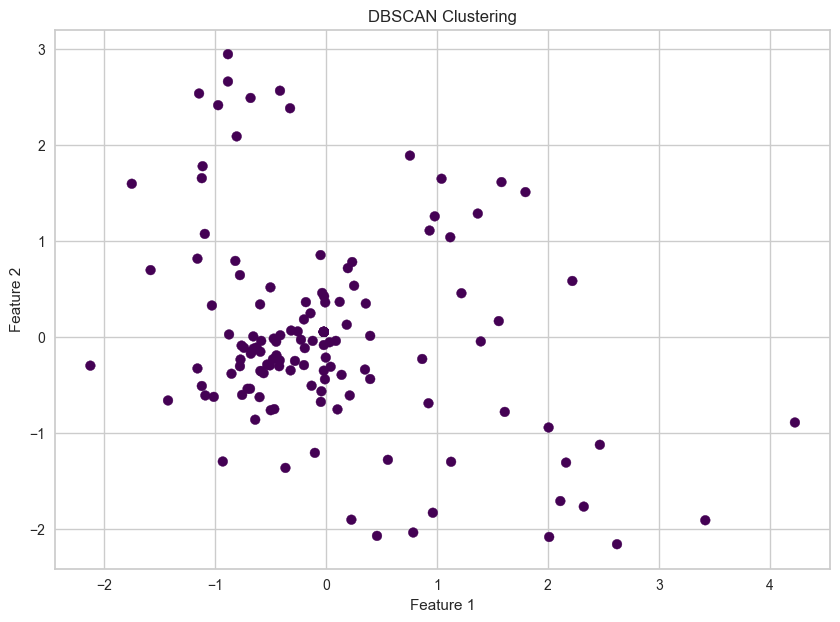

In [63]:
X = df_num

# Step 2: Preprocess the data
# Check for missing values, scale the data if necessary, etc.
# Example: Scaling the data (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine MinPts and epsilon using k-distance plot
MinPts = 4  # Set MinPts, typically 2 * number of dimensions (features)
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

# Plot k-distance graph to find the elbow point
plt.plot(distances)
plt.xlabel("Sample Index")
plt.ylabel("k-distance")
plt.show()

# Based on the k-distance plot, choose an appropriate epsilon value
epsilon = 0.3  # Adjust based on the plot

# Step 4: Apply DBSCAN
db = DBSCAN(eps=epsilon, min_samples=MinPts).fit(X_scaled)
labels = db.labels_

# Step 5: Visualize the results
# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Optionally, add cluster labels to the original DataFrame
df['Cluster'] = labels

# Save the DataFrame with cluster labels
df.to_csv('your_dataset_with_clusters.csv', index=False)
